In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
subspecies = pd.read_csv("Data/mgSs.coverage.stats.csv").rename(columns={"Unnamed: 0" : "subspecies"})
subspecies = subspecies['subspecies']
taxaKey = pd.read_csv("/Users/amaros/Desktop/mgss2/VIRGO2_taxaKey_all_gardnerella.csv")

def lighter_colors(base_color, num_colors):
    # Convert the base color to its RGB components
    r = int(base_color[1:3], 16)
    g = int(base_color[3:5], 16)
    b = int(base_color[5:7], 16)

    # Calculate the step values for degrading
    r_step = (255 - r) / num_colors
    g_step = (255 - g) / num_colors
    b_step = (255 - b) / num_colors

    # Generate the progressively lighter colors
    lighter_colors = []
    for i in range(num_colors):
        new_r = int(r + i * r_step)
        new_g = int(g + i * g_step)
        new_b = int(b + i * b_step)
        lighter_colors.append(f'#{new_r:02X}{new_g:02X}{new_b:02X}')

    return lighter_colors

# Example usage:
# base_color = "#FF0000"
# num_colors = 5
# lighter_colors_list = lighter_colors(base_color, num_colors)
# print(lighter_colors_list)


species = subspecies.apply(lambda x : x.split(".")[0])
couleur = []
for i,j in zip(list(species.value_counts().sort_index().index), species.value_counts().sort_index()) :
    if i in taxaKey['Taxa'].values:
        a = taxaKey[taxaKey['Taxa'] == i]['Color'].values[0]
        couleur.append(lighter_colors(a,j))
    else :
        couleur.append(['#8c8c8c']*j)

# Original list with single elements and sublists
original_list = couleur
# Create a new list with only the single elements
new_list = [item for sublist in original_list for item in (sublist if isinstance(sublist, list) else [sublist])]

subspecies_with_colors = pd.DataFrame({"Subspecies" : subspecies, "Color" : new_list})
subspecies_with_colors.to_csv("Data/subspecies_with_colors.csv", index=False)
subspecies_with_colors.head()

,Subspecies,Color
0,Actinotignum_sanguinis.1,#8c8c8c
1,Actinotignum_sanguinis.2,#8c8c8c
2,Aerococcus_christensenii.1,#616161
3,Aerococcus_christensenii.2,#7B7B7B
4,Aerococcus_christensenii.3,#959595


In [66]:
# gardnerella = [lighter_colors("#221886", 16)]
# gardnerella
# species[species.apply(lambda x : "Gardnerella" in x) == True].unique()

subspecies_with_colors[subspecies_with_colors['Subspecies'] == "Gardnerella_vaginalis"]
# gardnerella_df = pd.DataFrame({"Subspecies" : species[species.apply(lambda x : "Gardnerella" in x) == True]})

,Subspecies,Color


In [27]:
count = 0
for element in species :
    if "Gardnerella" in element :
        count += 1

count

58

In [67]:
mgcsts_samples = pd.read_csv("Data/mgCSTs.samples.df.csv")
mgCSTs_sort = pd.read_csv("Data/mgCSTs.sort.df.csv")

# data = mgcsts_samples
# data2 = mgCSTs_sort
deepsplit = 4
mincluster = 30

data = mgcsts_samples[(mgcsts_samples['deepSplit'] == deepsplit) & (mgcsts_samples['minClusterSize'] == mincluster)]
data = data.reset_index(drop = True)

data2 = mgCSTs_sort[(mgCSTs_sort['deepSplit'] == deepsplit) & (mgCSTs_sort['minClusterSize'] == mincluster)]
data2 = data2.reset_index(drop = True)

count_sample = []
for element in data2['dtc'].values :
    count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
data2['count_sample'] = count_sample

color = []
for element in data2['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color.append(a[0])
    else :
        color.append("#8c8c8c")
data2['color'] = color
data2


,dtc,meanRelabund,domTaxa,minClusterSize,deepSplit,mgCST,count_sample,color
0,11,0.849708,Lactobacillus_crispatus_1,30,4,1,102,#FF0000
1,13,0.828613,Lactobacillus_crispatus_2,30,4,2,97,#FF1919
2,7,0.864350,Lactobacillus_crispatus_3,30,4,3,114,#FF3333
3,24,0.832163,Lactobacillus_crispatus_4,30,4,4,43,#FF4C4C
4,27,0.832012,Lactobacillus_crispatus_5,30,4,5,33,#FF6666
5,20,0.872452,Lactobacillus_crispatus_6,30,4,6,58,#FF7F7F
6,26,0.785163,Lactobacillus_crispatus_7,30,4,7,35,#FF9999
7,23,0.861523,Lactobacillus_crispatus_8,30,4,8,44,#FFB2B2
8,28,0.649984,Lactobacillus_gasseri_1,30,4,9,33,#86BF4D
9,4,0.605190,Lactobacillus_iners_1,30,4,10,150,#FF8C00


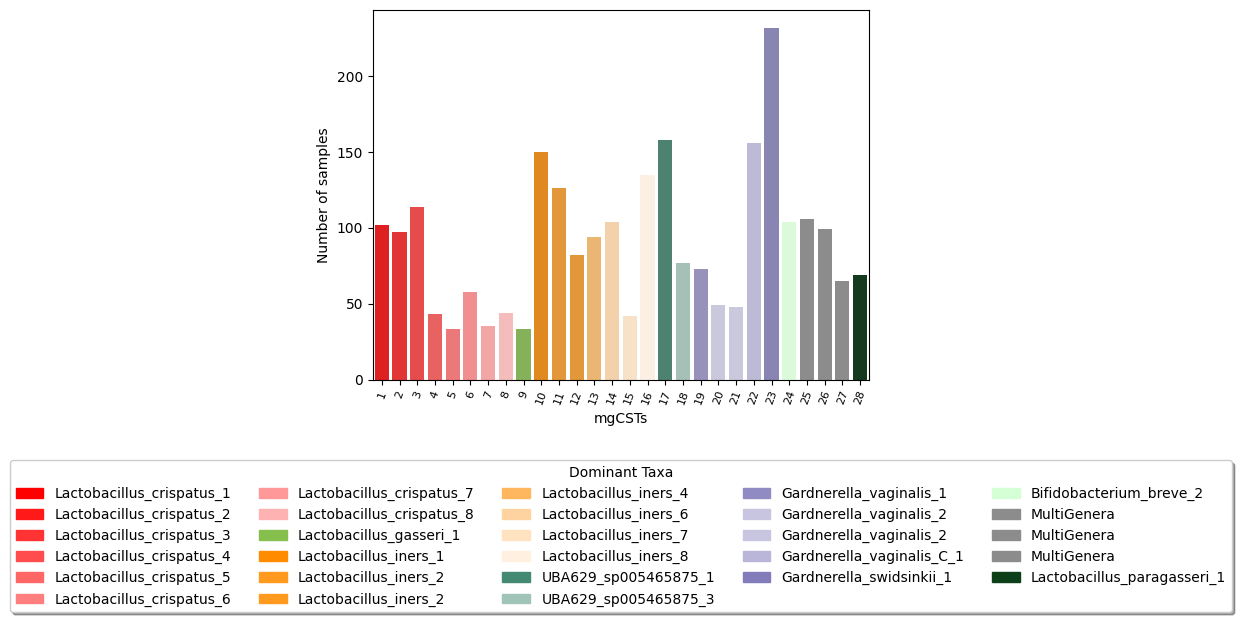

In [68]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

mpatches.Patch(color = (1.0, 0.09803921568627451, 0.09803921568627451, 1.0), label = "test")
g = sns.barplot(x = 'mgCST', y = 'count_sample', data = data2 , legend = False, hue = 'mgCST', palette=list(data2['color']))
fig1 = g.figure
plt.xlabel("mgCSTs")
plt.ylabel("Number of samples")
g.tick_params(axis='x', which='major', labelsize= 8, labelrotation=70)
# g.legend(title = 'mgCSTs',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
new_legend = data2['color'].apply(lambda x : mcolors.to_rgba(x)).values

new_patch = []
for i,j in zip(new_legend, data2['domTaxa'].values) :
    new_patch.append(mpatches.Patch(color = i, label = j))

g.legend(handles=new_patch, title = 'Dominant Taxa',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
g.grid(False)